# Miscallaneous code

Content:
1. Generate and visualize synthetic data
2. Experiment overview
3. Cleaning up error files
4. Profiling
5. Distributions

In [1]:
# preamble
import os
import pandas as pd
import numpy as np
from helper_functions import generate_syndata
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.special import gamma, beta, gammaln, betaln

label_fontsize = 12
subtitle_fontsize = 14
title_fontsize = 18

In [2]:
logP = -2.364e8
dlogP = -2.3643e8
dlogP/abs(logP)


-1.0001269035532996

## 1) Generate and visualize synthetic data

Synthetic data experiments:
- different number of nodes in cluster: balanced or unbalanced cluster size
- number of clusters K: few, "medium", many
- number of graph types (class imbalance): S1=S2 and S1>S2

we fix the number of nodes N = 100 and then adjust Nc wrt. K

Suggestion:
N = 100

K = 2, 5, 10, (20)

if balanced partition:

    Nc = N/K (balanced partition: all clusters have same size)

else: unbalanced partition

    Nc = (70, 30), (60, 20, 10, 5, 5), (20, 20, 10, 10, 10, 10, 5, 5, 5,5)

Steps:
1. Compute partition: 2 (balanced and unbalanced Nc) x 3 (different K) = 6 types of partitions
2. Compute block/cluster interactions (eta): same eta, completely different eta or partially different eta
3. Construct adjacency matrices

In [11]:
generate_NEWsyndata_randvals = False
if generate_NEWsyndata_randvals:
    main_dir = os.getcwd()
    for K in [2, 5, 10]:
        eta1 = np.random.rand(K, K)
        eta2 = np.random.rand(K, K)
        np.save(os.path.join(main_dir,'data','synthetic','eta1_K'+str(K)+'.npy'), eta1)
        np.save(os.path.join(main_dir,'data','synthetic','eta2_K'+str(K)+'.npy'), eta2)

    eta2_K2_randvals = np.random.rand(1,1)
    eta2_K5_randvals = np.random.rand(3,3)
    eta2_K10_randvals = np.random.rand(5,5)
    np.save(os.path.join(main_dir,'data','synthetic','eta2_K2_randvals.npy'), eta2_K2_randvals)
    np.save(os.path.join(main_dir,'data','synthetic','eta2_K5_randvals.npy'), eta2_K5_randvals)
    np.save(os.path.join(main_dir,'data','synthetic','eta2_K10_randvals.npy'), eta2_K10_randvals)

    N=100
    S1_5_N100_randthres = np.random.rand(N,N,5) # S1=5
    S1_10_N100_randthres = np.random.rand(N,N,10) # S1=10
    S2_N100_randthres = np.random.rand(N,N,5) # S2=5
    np.save(os.path.join(main_dir,'data','synthetic','S1_5_N100_randthres.npy'), S1_5_N100_randthres)
    np.save(os.path.join(main_dir,'data','synthetic','S1_10_N100_randthres.npy'), S1_10_N100_randthres)
    np.save(os.path.join(main_dir,'data','synthetic','S2_N100_randthres.npy'), S2_N100_randthres)

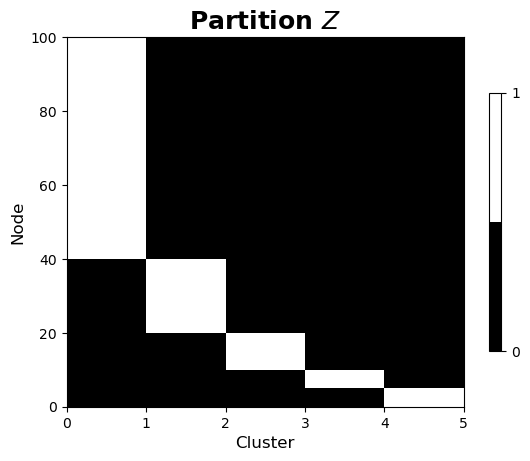

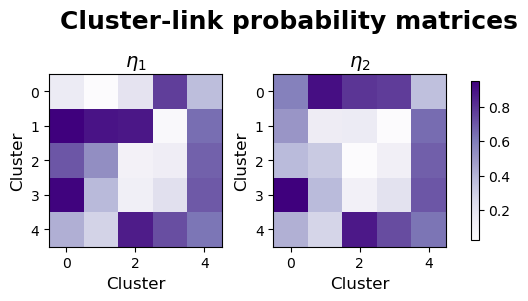

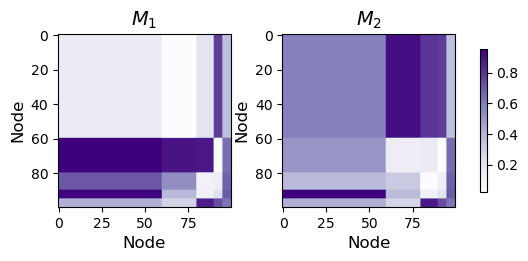

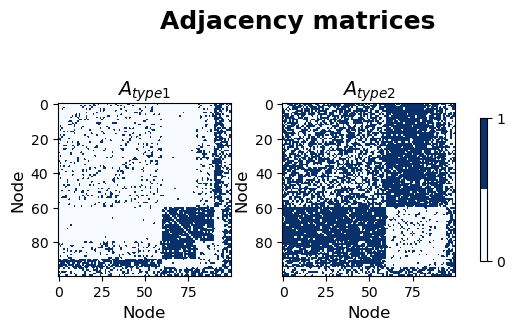

In [3]:
A, z, eta1, eta2, C1, C2 = generate_syndata(N=100, K=5, S1=5, S2=5, 
                                    Nc_type='unbalanced', 
                                    eta_similarity='part_diff',
                                    seed=0, disp_data=True)

In [4]:
main_dir = os.getcwd()

In [5]:
A = np.load(os.path.join(main_dir,'data','synthetic','A_100_2_5_5_balanced_comp_diff.npy'),allow_pickle=True)

In [6]:
np.array_equal(A[:,:,0],A[:,:,2])

False

In [4]:
fig, axs = plt.subplots(2,5, figsize=(15, 6), constrained_layout=True)
axs = axs.ravel()

#default_blue = '#1f77b4'
#cmap_binary = ListedColormap(['white', default_blue]) 
map_values1 = [0,1]
colormap = plt.cm.Blues
cmap1 = plt.cm.colors.ListedColormap(colormap(np.linspace(0, 1, len(map_values1))))

for s in range(10):
    if s < 5:
        im = axs[s].imshow(A[:,:,s], cmap=cmap1)
        #axs[s].set_title('Type 1: '+str(s+1), fontsize=subtitle_fontsize, weight='bold')
        axs[s].set_ylabel('Nodes', fontsize=label_fontsize)
        axs[s].set_xlabel('Nodes', fontsize=label_fontsize)
    else:
        im = axs[s].imshow(A[:,:,-(s-4)], cmap=cmap1)
        #axs[s].set_title('Type 2: '+str(s-4), fontsize=subtitle_fontsize, weight='bold')
        axs[s].set_ylabel('Nodes', fontsize=label_fontsize)
        axs[s].set_xlabel('Nodes', fontsize=label_fontsize)

axs[0].set_title('Type 1', fontsize=subtitle_fontsize, weight='bold')
axs[5].set_title('Type 2', fontsize=subtitle_fontsize, weight='bold')

fig.suptitle('Adjacency matrices for synthetic data', fontsize=title_fontsize, weight='bold')
cbar = fig.colorbar(im, ax=axs.ravel().tolist(), shrink=0.95, ticks=[0,1])

In [2]:
generate_NEWsyndata = False
if generate_NEWsyndata:
    N = 100
    S2 = 5
    K_list= [2, 5, 10]
    S1_list = [5, 10]
    Nc_type_list = ['balanced', 'unbalanced']
    eta_similarity_list = ['same', 'comp_diff', 'part_diff']
    for K in K_list:
        for S1 in S1_list:
            for Nc_type in Nc_type_list:
                for eta_similarity in eta_similarity_list:
                    A, Z, _, _, _, _ = generate_syndata(N, K, S1, S2, Nc_type, eta_similarity, seed=0, disp_data=False)
                    A_filename = str(N)+'_'+str(K)+'_'+str(S1)+'_'+str(S2)+'_'+str(Nc_type)+'_'+eta_similarity+'.npy'
                    Z_filename = 'K'+str(K)+'_'+Nc_type+'.npy'
                    np.save(os.path.join('/work3/s174162/speciale/data/synthetic/', 'A_'+A_filename), A)
                    np.save(os.path.join('/work3/s174162/speciale/data/synthetic/', 'Zini_'+Z_filename), Z)

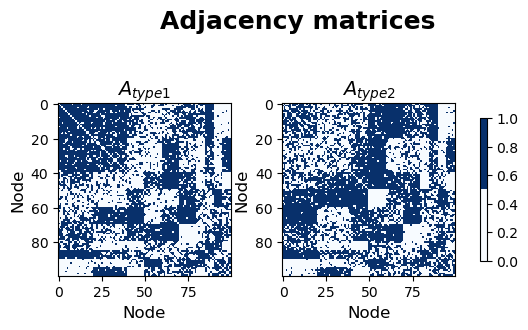

In [ ]:
label_fontsize = 12
subtitle_fontsize = 14
title_fontsize = 18
# example - visualize saved synthetic data
A = np.load('/work3/s174162/speciale/data/synthetic/A_100_10_5_5_unbalanced_part_diff.npy', allow_pickle=True)

map_values1 = [0,1]
colormap = plt.cm.Blues
cmap1 = plt.cm.colors.ListedColormap(colormap(np.linspace(0, 1, len(map_values1))))

fig, ax = plt.subplots(1,2)
plt.subplots_adjust(wspace=0.3, top=1.1)
im = ax[0].imshow(A[:,:,0],cmap=cmap1)
ax[0].set_ylabel('Node', fontsize=label_fontsize)
ax[0].set_xlabel('Node', fontsize=label_fontsize)
ax[0].set_title('$A_{type1}$', fontsize=subtitle_fontsize, weight='bold')
im = ax[1].imshow(A[:,:,-1], cmap=cmap1)
ax[1].set_ylabel('Node', fontsize=label_fontsize)
ax[1].set_xlabel('Node', fontsize=label_fontsize)
ax[1].set_title('$A_{type2}$', fontsize=subtitle_fontsize , weight='bold')
cbar = fig.colorbar(im, ax=ax.ravel().tolist(), shrink=0.3)
fig.suptitle('Adjacency matrices',fontsize=title_fontsize, weight='bold')
plt.show()



## 2) Experiment overview

In [2]:
# Define the top-level directory containing the log files
top_dir = 'results'

# Create an empty list to store the data from each log file
data = []

# Recursively iterate over all log files in the directory structure
for root, dirs, files in os.walk(top_dir):
    for file_name in files:
        if file_name == 'log.txt':
            # Read the contents of the file
            with open(os.path.join(root, file_name), 'r') as f:
                file_data = f.readlines()
            
            # Parse the data from the file and add it to the list
            file_dict = {}
            for line in file_data:
                key, value = line.strip().split(': ')
                # Try to convert the value to a number
                try:
                    value = float(value)
                    # Check if the value is an integer and convert it if it is
                    if value.is_integer():
                        value = int(value)
                except ValueError:
                    pass
                file_dict[key] = value
            data.append(file_dict)

# Convert the list of dictionaries to a Pandas DataFrame
df = pd.DataFrame(data)
df = df.fillna('None')


In [10]:
# delete random test runs
df.loc[df.maxiter_gibbs < 100]

,dataset,exp_name,matlab_compare,N,K,S1,S2,Nc_type,eta_similarity,model_type,splitmerge,noc,maxiter_gibbs,maxiter_eta0,maxiter_alpha,atlas_name,n_rois,threshold_annealing


In [11]:
import shutil

df_folders_to_delete = df.loc[df.
                              maxiter_gibbs < 100,['dataset','exp_name']]
df_folders_to_delete['folder'] = df_folders_to_delete.dataset + '/' + df_folders_to_delete.exp_name
for folder in df_folders_to_delete.folder:
    # Use shutil.rmtree to recursively delete the folder and its contents
    shutil.rmtree('results/'+folder)

In [3]:
# count experiment initializations
config_names = df.columns.tolist()
config_names.remove('exp_name')
duplicated_rows = df.duplicated(subset=config_names)
unique_rows = df[~duplicated_rows].copy()
duplicate_count = df.groupby(config_names, as_index=False)['exp_name'].agg(list)
duplicate_count['n_exp'] = duplicate_count['exp_name'].apply(len)
df_new = unique_rows.merge(duplicate_count, on=config_names, how='left')
df_new = df_new.drop('exp_name_x', axis=1)
df_new = df_new.rename(columns={'exp_name_y': 'exp_name_list'})

In [4]:
df_new

,dataset,matlab_compare,N,K,S1,S2,Nc_type,eta_similarity,model_type,splitmerge,noc,maxiter_gibbs,maxiter_eta0,maxiter_alpha,atlas_name,n_rois,threshold_annealing,exp_name_list,n_exp
0,synthetic,False,100.0,5.0,5.0,5.0,unbalanced,comp_diff,parametric,False,10,100,10,100,None,None,None,[parametric_5_5_5_unbalanced_comp_diff_2023-06...,10
1,synthetic,False,100.0,2.0,5.0,5.0,unbalanced,part_diff,parametric,False,2,100,10,100,None,None,None,[parametric_2_5_5_unbalanced_part_diff_2023-06...,10
2,synthetic,False,100.0,2.0,5.0,5.0,balanced,comp_diff,parametric,False,2,100,10,100,None,None,None,[parametric_2_5_5_balanced_comp_diff_2023-06-1...,10
3,synthetic,False,100.0,10.0,10.0,5.0,unbalanced,comp_diff,nonparametric,True,5,100,10,100,None,None,None,[nonparametric_10_10_5_unbalanced_comp_diff_20...,10
4,synthetic,False,100.0,2.0,10.0,5.0,unbalanced,comp_diff,parametric,False,10,100,10,100,None,None,None,[parametric_2_10_5_unbalanced_comp_diff_2023-0...,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,hcp,None,None,None,None,None,None,None,parametric,False,10,1000,10,100,schaefer,200.0,False,[parametric_schaefer200_2023-06-02 01:28:26.76...,11
252,hcp,None,None,None,None,None,None,None,parametric,False,20,1000,10,100,schaefer,300.0,False,[parametric_schaefer300_2023-06-02 00:54:04.64...,11
253,hcp,None,None,None,None,None,None,None,parametric,False,2,1000,10,100,schaefer,200.0,False,[parametric_schaefer200_2023-06-08 12:10:35.32...,10
254,hcp,None,None,None,None,None,None,None,parametric,False,2,1000,10,100,schaefer,300.0,False,[parametric_schaefer300_2023-06-08 12:08:09.04...,10


In [5]:
df_new.dataset.value_counts()

synthetic    216
hcp           23
decnef        17
Name: dataset, dtype: int64

In [71]:
unique_models # actually didn't intend to run hpc data with noc=2 for nonparametric on 200 and 300, but it is nice to have it anyway

,model_type,n_rois,noc
0,nonparametric,100.0,2
1,nonparametric,100.0,30
2,parametric,100.0,2
3,parametric,100.0,10
4,parametric,100.0,20
5,parametric,100.0,30
6,parametric,100.0,40
7,parametric,100.0,50
9,nonparametric,200.0,2
10,parametric,200.0,2


In [76]:
df_new.n_exp.value_counts()

10    237
11     13
9       6
Name: n_exp, dtype: int64

In [39]:
#import shutil
#folders_to_delete = df_new[df_new.n_exp == 20].exp_name_list[27][:10]
#for folder in folders_to_delete:
#    shutil.rmtree('results/decnef/'+folder)

In [6]:
# save dataframe with experiment overview
main_dir = os.getcwd()
df_new.to_csv(os.path.join(main_dir, 'results', 'experiment_overview.csv'),index=False)

## 3) Clean up error files that was interrupted

In [2]:
# Cleaning up output and error files for experiments
# define the directory to search for .txt files
directory = os.getcwd()

# define the word to search for
word_to_find = "KeyboardInterrupt"

# loop over all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        # open the file and read its contents
        with open(os.path.join(directory, filename), "r") as file:
            file_contents = file.read()
            
        # check if the word is in the file contents
        if word_to_find in file_contents:
            # delete the file
            os.remove(os.path.join(directory, filename)) # deleting error file 
            output_filename = 'out_'+filename.split('err_')[1]
            os.remove(os.path.join(directory, output_filename)) # deleting corresponding output file
            print(f"File {filename} deleted.")
            print(f"File {output_filename} deleted.")

In [2]:
# removing hpc output files
def remove_files_with_keyword(directory, keyword):
    for filename in os.listdir(directory):
        if keyword in filename:
            filepath = os.path.join(directory, filename)
            os.remove(filepath)

# Specify the directory where the files are located
directory = '/work3/s174162/speciale'

# Remove files containing "out_big"
remove_files_with_keyword(directory, "out_big")

# Remove files containing "err_big"
remove_files_with_keyword(directory, "err_big")

## 5) Distributions
https://datascience.oneoffcoder.com/dirichlet-multinomial-distribution.html

In [1]:
# Dirichlet-Multinomial prior
def logDirMult(N, K, alpha, n_k):
    # not in log: (gamma(N + 1) * gamma(K + alpha)) / gamma(K*alpha + N) * np.prod(gamma(n_k + alpha)/(gamma(n_k + 1) * gamma(alpha)))
    return gammaln(K*alpha) - gammaln(K * alpha + N) - K * gammaln(alpha) + np.sum(gammaln(n_k + alpha))
    # model implementation:
    #gammaln(self.noc * self.alpha) - gammaln(self.noc * self.alpha + self.N) - self.noc * gammaln(self.alpha) + np.sum(gammaln(self.sumZ + self.alpha))

# Chinese Restaurant Process prior
def logCRP(N, K, alpha, n_k):
    # not in log: (gamma(alpha) * alpha**K) / gamma(alpha + N) * np.prod(gamma(n_k))
    return gammaln(alpha) + K * np.log(alpha) - gammaln(alpha + N) + np.sum(gammaln(n_k))
    # model implementation: 
    # gammaln(self.alpha) + self.noc * np.log(self.alpha) - gammaln(self.alpha + self.N) + constZ
    # where constZ = np.sum(gammaln(self.sumZ))
   
# Dirichlet prior
def logDir(eta, eta0):
    # not in log: 1/beta(eta0) * np.prod(eta**(eta0-1))
    S = len(eta0)
    return gammaln(eta0*S) - np.log(gamma(eta0)**S) + np.sum(np.log(eta**(eta0-1)))

# Multinomial likelihood
def logMult(nu, eta0, K, X, normalize=False):
    C = np.triu(gammaln(np.sum(X+1,axis=2)) - np.sum(gammaln(X+1),axis=2)).sum()
    logBeta_nueta0 = np.sum(gammaln(nu + eta0),axis=-1) - gammaln(np.sum(nu + eta0,axis=-1))
    logBeta_eta0 = - np.sum(gammaln(eta0),axis=-1) + gammaln(np.sum(eta0,axis=-1))
    if normalize:
        return C - K*(K+1)/2*logBeta_eta0 + np.triu(logBeta_nueta0).sum()
    else:
        return np.triu(logBeta_nueta0-logBeta_eta0).sum() # same as -K*(K+1)/2*logBeta_eta0 + np.triu(logBeta_nueta0).sum()
    
    # model implementation:
    # np.triu(mult_eval).sum() - self.noc * (self.noc + 1) / 2 * const 
    # where mult_eval = self.multinomialln(n_link + self.eta0)
    # and const = self.multinomialln(self.eta0) 
    

In [ ]:
S = 3
N = 10
K = 50

X = np.random.rand(N, N, S) > 0.3
Z = np.random.rand(K, N) > 0.5
alpha = np.log(N)
eta0 = np.ones(S)
eta = np.random.rand(K, K, S)
n_k = np.sum(Z, axis=0)
nu = np.random.rand(K, K, S)

In [ ]:
logZ_DirMult = logDirMult(N, K, alpha, n_k)
logZ_CRP = logCRP(N, K, alpha, n_k)
logeta_Dir = logDir(eta, eta0)
logX_Mult = logMult(nu, eta0, K, X, normalize=False)
logX_Mult_norm = logMult(nu, eta0, K, X, normalize=True)
print('logZ_DirMult =', logZ_DirMult)
print('logZ_CRP =', logZ_CRP)
print('logeta_Dir =', logeta_Dir)
print('logX_Mult =', logX_Mult)
print('logX_Mult_norm =', logX_Mult_norm)

In [ ]:
# testing method for computing nlink (nu)
X_test = np.array([[0,1,0,1,0],[1,0,1,0,1],[0,1,0,1,0],[1,0,1,0,1],[0,1,0,1,0]])
Z_test = np.array([[1,0,1,0,0],[0,1,0,1,0],[0,0,0,0,1]])
n_linktest = Z_test @ X_test @ Z_test.T
print(n_linktest) 